# Heart Attack Prediction

### Goal:
Try to predict whether a patient with given features has a high or low chance of having a heart attack.

<img src= "https://i.gifer.com/Kt3C.gif" width="500" align="center" >

### Heart Disease Facts

* Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States.
* Every 40 seconds, someone has a heart attack in the United States.
* Unfortunately, heart attacks are projected to continue to rise over the next decades.

### Objectives

1. Determine which machine learning model most accurately predicts how likely a heart attack will occur in a person. 
2. Gain a better understanding of the factors that increase the likelihood of heart attacks. 

In [1]:
# import libraries

# for handling datasets and perhaps using linear algebra
import pandas as pd
import numpy as np

# for plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt

# to give measurements of the results of our classifications
from sklearn.metrics import accuracy_score, confusion_matrix

## Exploratory Data Analysis

In [2]:
# load the data
heart = pd.read_csv('heart.csv')

In [3]:
# dataset dimensions
heart.shape
# 303 observations and 14 columns

(303, 14)

In [4]:
# peak our heart data frame
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Description of all (14) columns in heart dataframe
- **Age** = Age of a person 
- **Sex** = Gender of a person 
- **cp** = Chest Pain type chest pain type 
    - 1 = typical angina
    - 2 = atypical angina
    - 3 = non-anginal pain
    - 4 = asymptomatic
- **trtbps** = resting blood pressure (in mm Hg) 
- **chol** = cholesterol in mg/dl fetched via BMI sensor 
- **fbs** = (fasting blood sugar > 120 mg/dl) (1=true; 0=false) 
- **restecg** = resting electrocardiographic results 
    - 0 = normal
    - 1 = having ST-T wave abnormality (T wave incersions and/or ST elevation or depression of > 0.05 mV)
    - 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalachh** = maximum heart rate achieved 
- **exng, exang** = exercise induced angina (1=yes; 0=no) 
- **old peak** = previous peak 
- **slp** = slope 
- **caa, ca** = number of blood vessels (0-3) 
- **thall** = thal rate 
- **output, target** = target variable (0=less chance of heart attack, 1=more chance of heart attack) 

## Cleaning the Data

In [5]:
# check for duplicated observations
heart.duplicated().sum()

1

In [6]:
# show the duplicated row
heart[heart.duplicated()] 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


We can confirm this is a duplicate value as this is a copy of observation 163.

In [7]:
# original data (duplicates at 163-164)
print(heart.loc[160:169]) 

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
160   56    1   1     120   240    0        1       169     0      0.0    0   
161   55    0   1     132   342    0        1       166     0      1.2    2   
162   41    1   1     120   157    0        1       182     0      0.0    2   
163   38    1   2     138   175    0        1       173     0      0.0    2   
164   38    1   2     138   175    0        1       173     0      0.0    2   
165   67    1   0     160   286    0        0       108     1      1.5    1   
166   67    1   0     120   229    0        0       129     1      2.6    1   
167   62    0   0     140   268    0        0       160     0      3.6    0   
168   63    1   0     130   254    0        0       147     0      1.4    1   
169   53    1   0     140   203    1        0       155     1      3.1    0   

     caa  thall  output  
160    0      2       1  
161    0      2       1  
162    0      2       1  
163    4      2       1  


In [8]:
# removes duplicates and make a new dataframe as dfHeart
dfHeart = heart.drop_duplicates()

In [9]:
# dataset info
dfHeart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [10]:
# check for missing values
heart.isnull().sum().sum()

0

## Visualization

In [11]:
#1 is High Chance of Heart Attack and 0 is Low Chance of Heart Attack
dfHeart['output'].value_counts() 

1    164
0    138
Name: output, dtype: int64

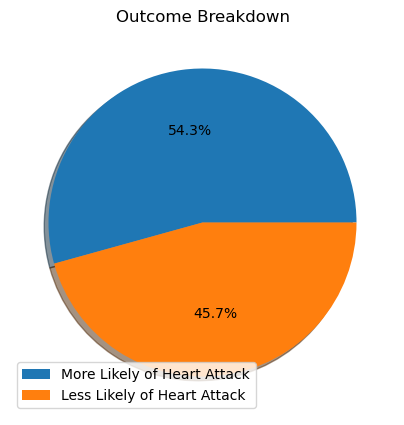

In [12]:
# pie chart on distribution of class
dfHeart['output'].value_counts().plot(kind='pie',y='sex', figsize=(5,5), shadow=True, labeldistance=None, ylabel='',
title="Outcome Breakdown", autopct='%1.1f%%', legend=True)

plt.legend(["More Likely of Heart Attack","Less Likely of Heart Attack"])
plt.show()

To get a better of understanding of our dataset, we do some exploratory data analysis through visualization. To begin with, we look at our predicted variable which is outcome. The pie chart shows that outcomes for risk of heart attack are split nearly evenly at a one-to-one ratio of more and less likely.

### Correlation of the 14 variables

Correlation Matrix is used to verify absence of multicollinearity amongst independent variables. Avoiding correlation amongst independent varibables are imperative since independent variables must remain 'independent'.  Note that lighter shades represents positive correlation while darker shades represents negative correlation. Through visual inspection we note that none of our prediction variables are strongly correlated hence all predictors should remain. 

In [13]:
# correlation matrix 
dfHeart.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


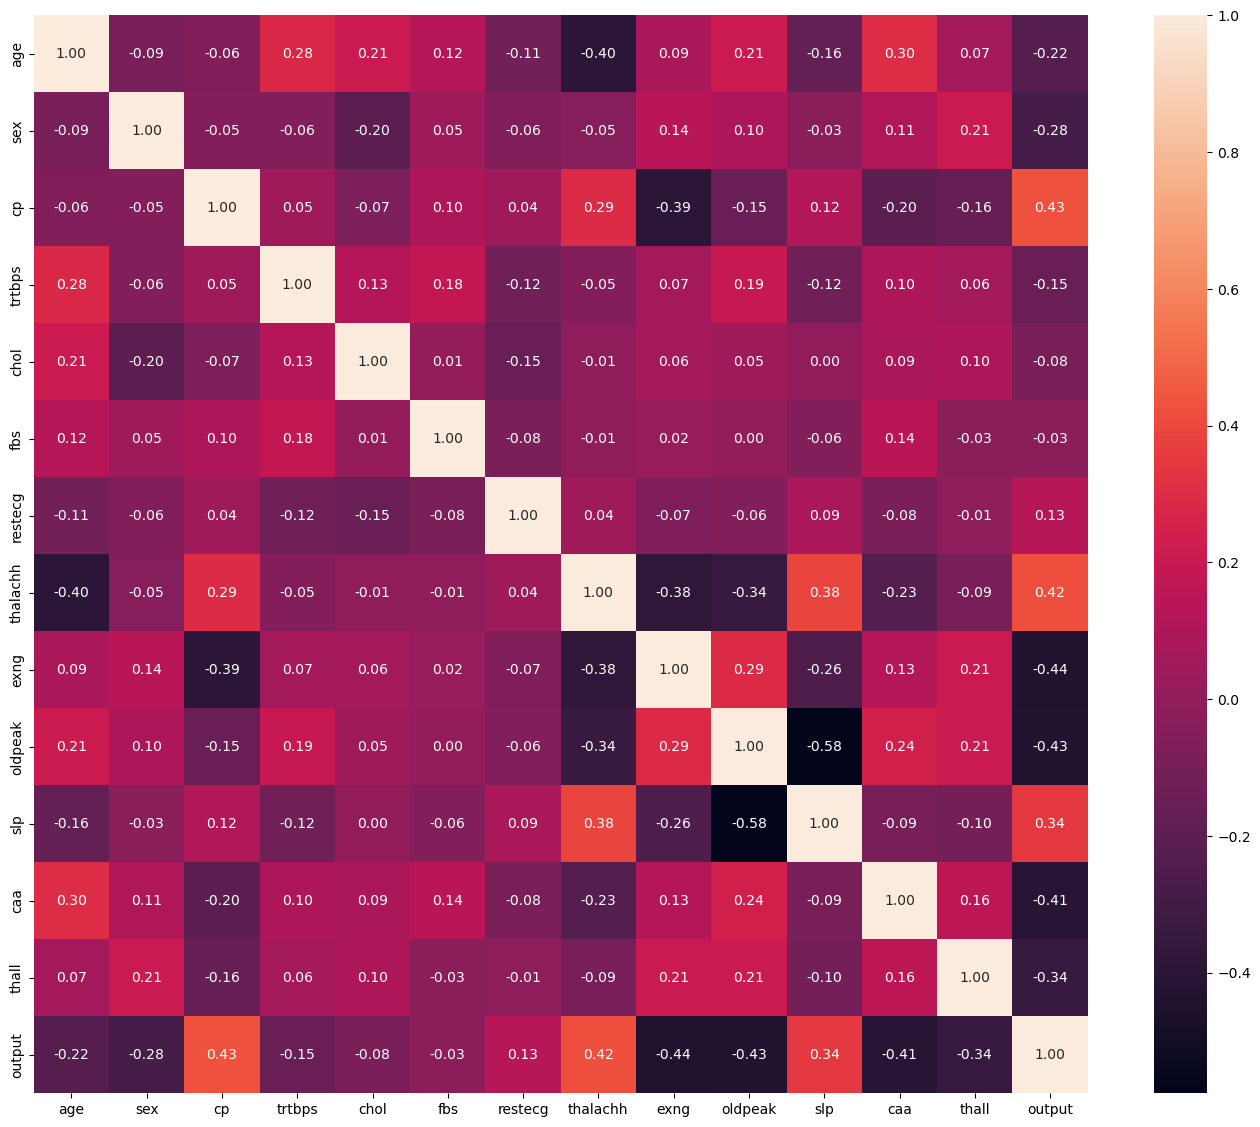

In [14]:
# heatmap of correlation matrix
plt.figure(figsize=(17,14))
sns.heatmap(dfHeart.corr(), annot=True, fmt = '.2f')
plt.show()

From above we can see the features mostly correlated with our target variable output is cp, thalachh, exng, oldpeak, slp, and caa. Therefore, we should have these as predictors in trying to predict whether a patient is high or low likely of having a heart attack.

### Continuous Variables

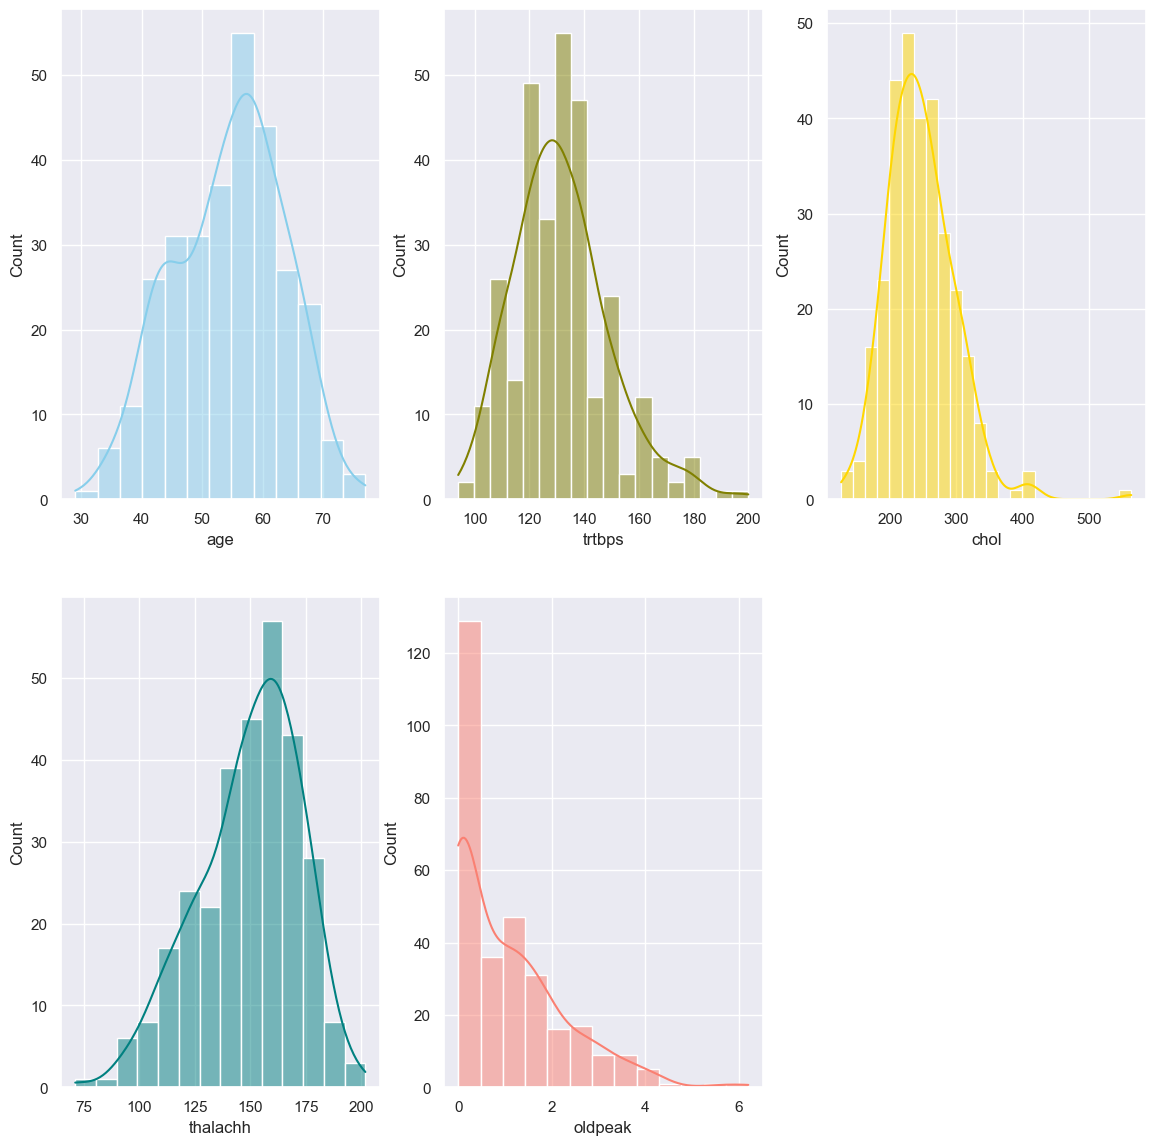

In [15]:
# histograms of continous variables
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(14,14))

sns.histplot(data=dfHeart, x="age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dfHeart, x="trtbps", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dfHeart, x="chol", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=dfHeart, x="thalachh", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=dfHeart, x="oldpeak", kde=True, color="salmon", ax=axs[1, 1])

fig.delaxes(axs[1,2]) # removes that empty graph in the (1,2) position
plt.show()

### Discrete variables

In [16]:
# list our discrete variables
discrete_data = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
list(enumerate(discrete_data))

[(0, 'sex'),
 (1, 'cp'),
 (2, 'fbs'),
 (3, 'restecg'),
 (4, 'exng'),
 (5, 'slp'),
 (6, 'caa'),
 (7, 'thall')]

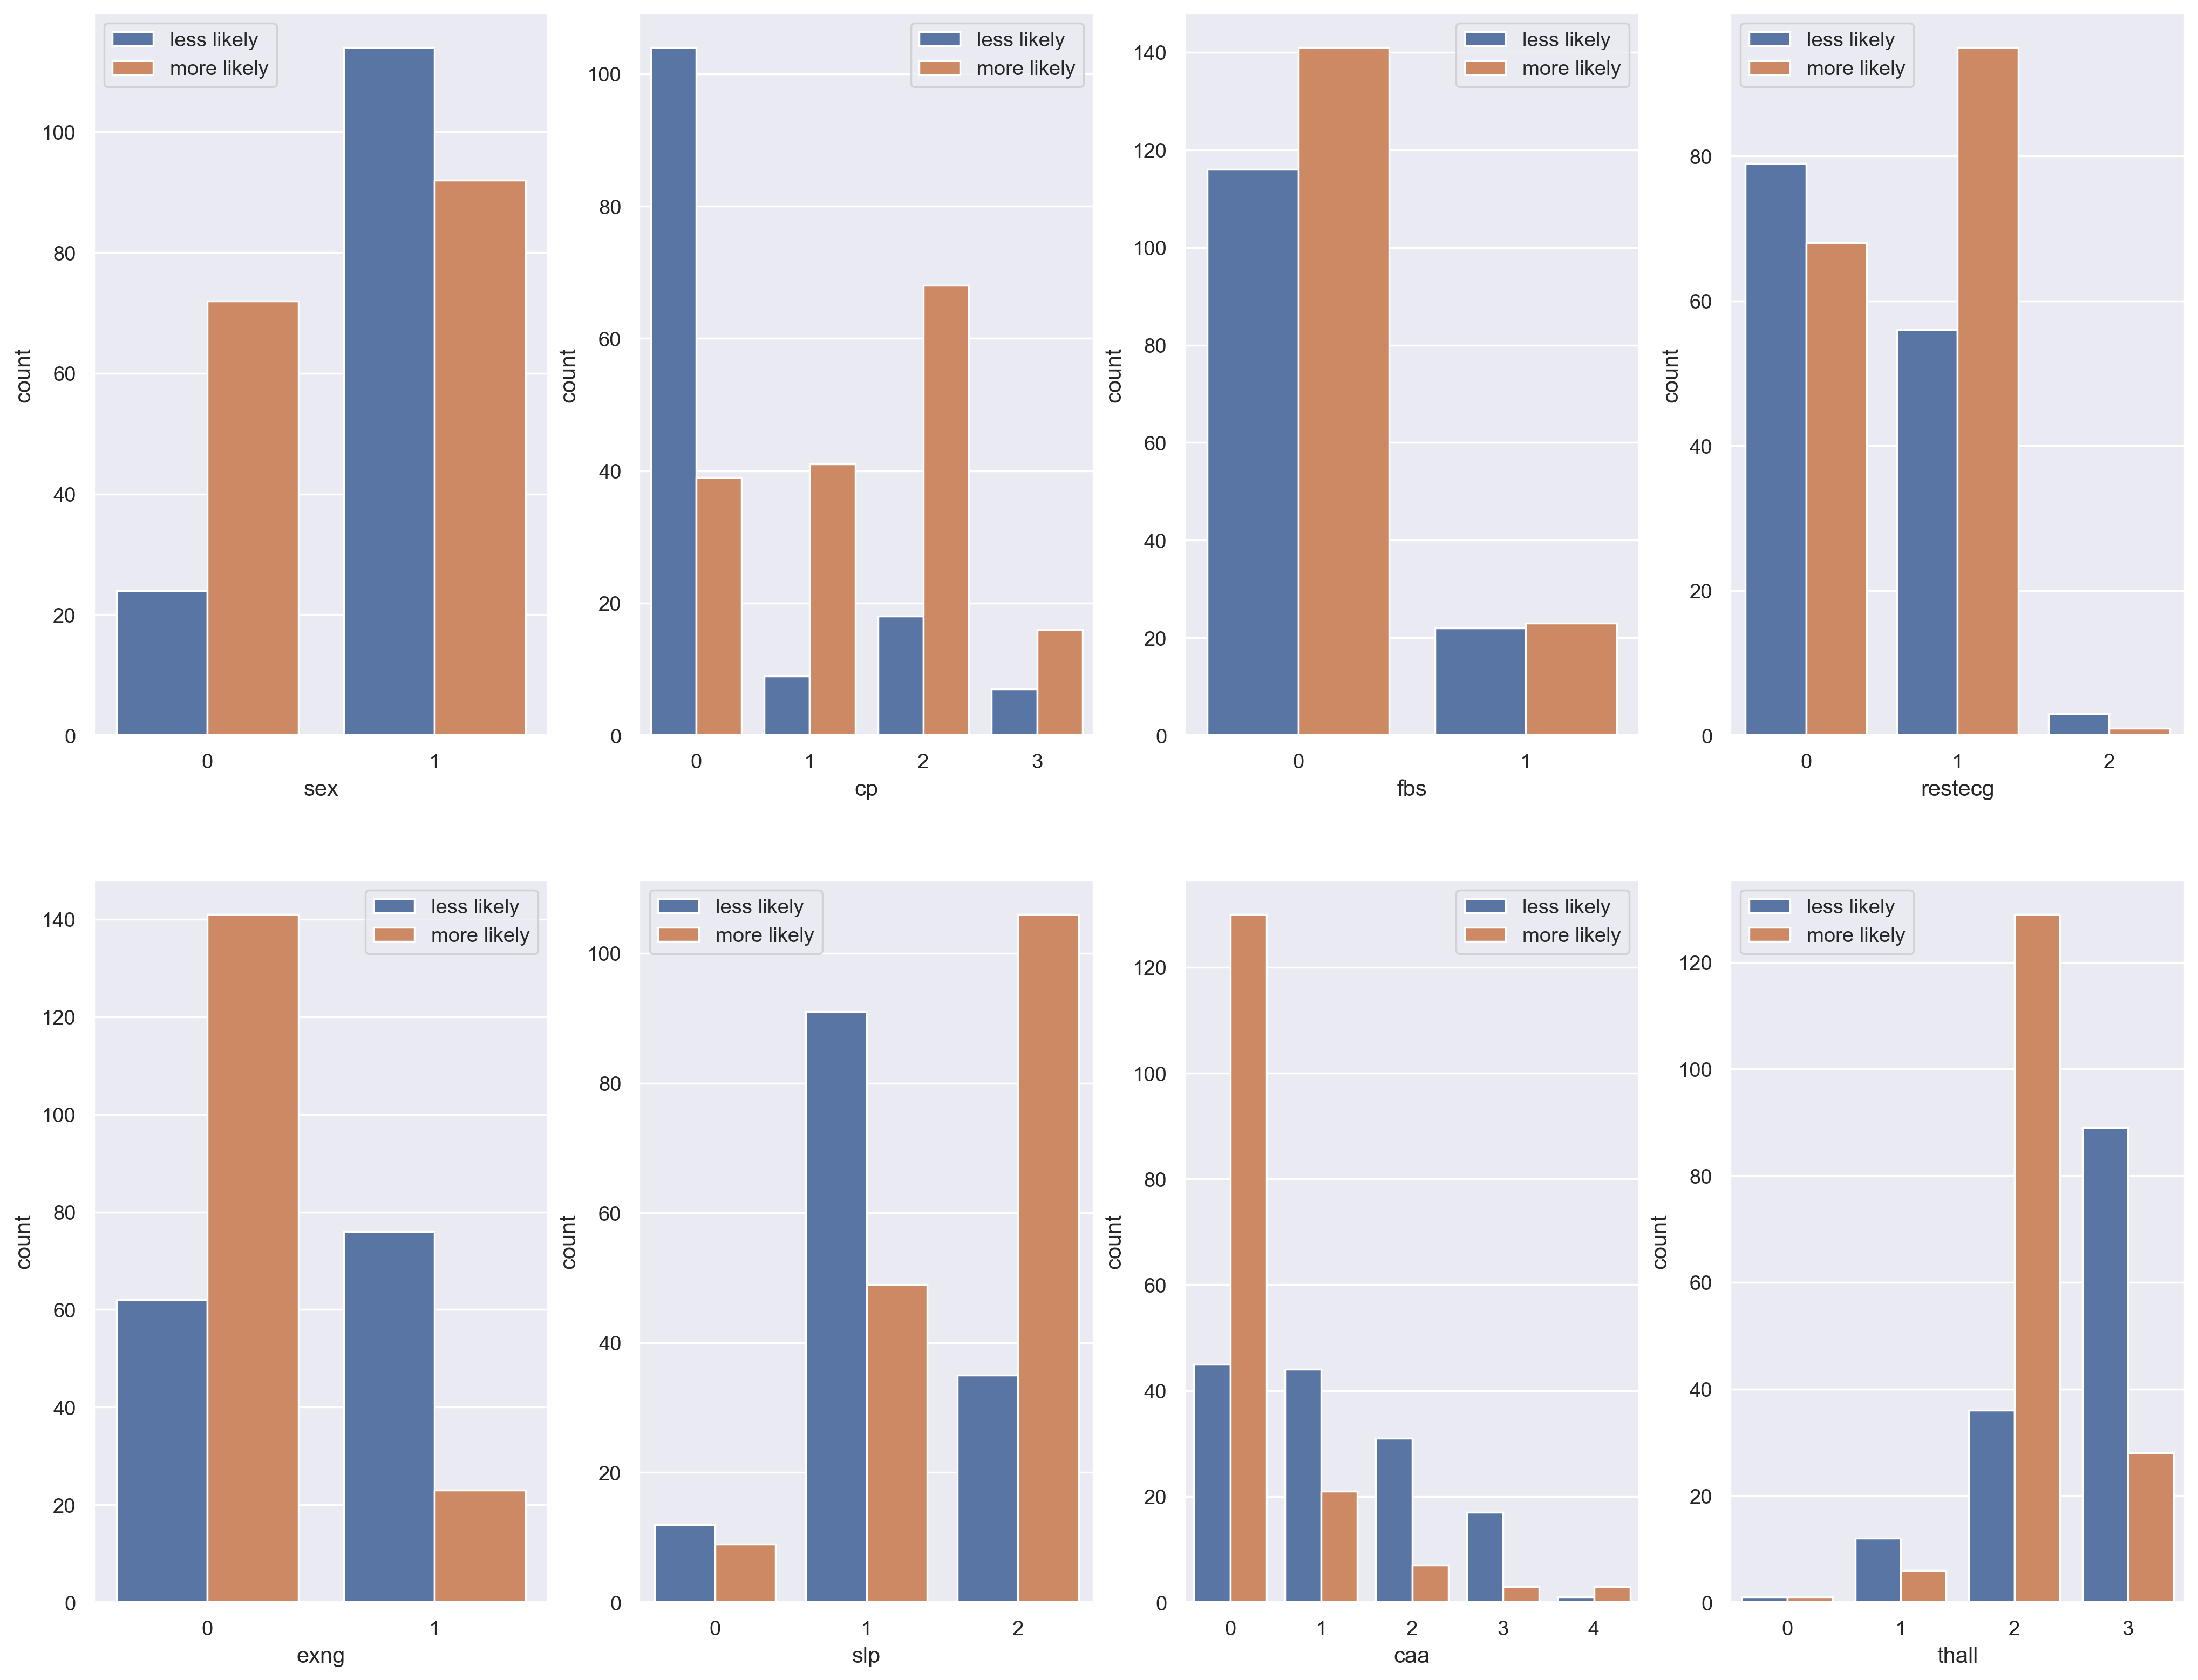

In [17]:
# Comparing how each variable correlates with how less or more likely someone has a heart attacksns.set_theme(style="darkgrid")
plt.figure(figsize=(20,32),dpi = 250)
for i in enumerate(discrete_data):
    plt.subplot(4,4,i[0]+1)
    sns.countplot(x = i[1],hue = 'output', data = dfHeart)
    plt.legend(["less likely","more likely"])

The discrete distributions reveal more interesting details. Not only are we including frequency of each class, we also breakdown within each class the frequency of more or less likely outcomes. For example, looking at sex/gender, we see that our dataset has more men then women. However, what is interesting is that women are more likely to experience heart attacks relative to men, holding all other variables constant. We were surprised by this result but the CDC website also confirms this result. Other takeways include noticing that high levels of chest pain are associated with higher likelihoods of heart attack. 

# Splitting Data Set into Training and Test Sets

In [18]:
# import train test split
from sklearn.model_selection import train_test_split

In [19]:
# our predictor variables
X = dfHeart.drop(['output'], axis=1)

# our target/response variable
y = dfHeart['output']

In [20]:
# train test split our data with a test size of 20 percent
X_trainHeart, X_testHeart, Y_trainHeart, Y_testHeart = train_test_split(X, y, test_size = .20, random_state=0)

In [21]:
# training set
X_trainHeart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [22]:
# target variable training set
Y_trainHeart

74     1
153    1
64     1
296    0
288    0
      ..
252    0
193    0
117    1
47     1
173    0
Name: output, Length: 241, dtype: int64

In [23]:
# training set shape
X_trainHeart.shape, Y_trainHeart.shape

((241, 13), (241,))

In [24]:
# testing set shape
X_testHeart.shape, Y_testHeart.shape

((61, 13), (61,))

In [25]:
#To ensure Training/Test set are 80/20
241/302, 61/302

(0.7980132450331126, 0.20198675496688742)

# Machine Learning Algorithms 

In [26]:
accuracy_scores = {} # store a dictionary of accuracies for the following methods
def add_to_accuracy_report(name_of_method, score): # function to append the accuracies to the dictionary
    accuracy_scores[name_of_method]=score

### K-Nearest Neighbors (KNN)

In [27]:
# import k-nearest neighbors classifier since we have a classification problem
from sklearn.neighbors import KNeighborsClassifier

The accuracy of KNN for k=1 is :  59.01639344262295 % 



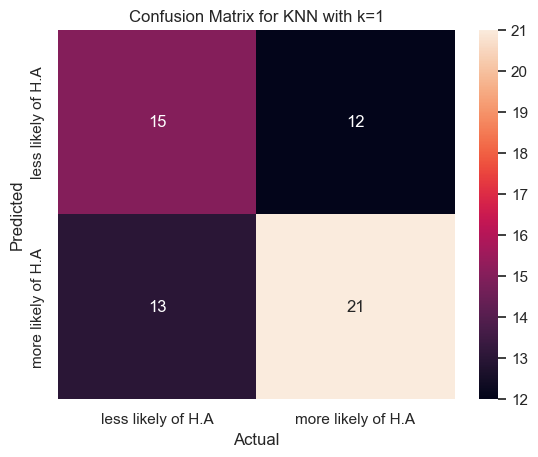

In [28]:
# instantiate knn classifier with k=1 (1 neighbor)
model_KNN_Heart = KNeighborsClassifier(n_neighbors = 1)  
model_KNN_Heart.fit(X_trainHeart, Y_trainHeart)
predicted = model_KNN_Heart.predict(X_testHeart)
  

cm_KNN_Heart = confusion_matrix(Y_testHeart, predicted)
ax= plt.subplot()

#annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_KNN_Heart, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Actual');ax.set_ylabel('Predicted'); 
ax.set_title('Confusion Matrix for KNN with k=1'); 
ax.xaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']); 
ax.yaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']);
print("The accuracy of KNN for k=1 is : ", accuracy_score(Y_testHeart, predicted)*100, "% \n")

In our confusion matrix, the upper left corner represents the true negatives which in our case represents the model accuracy of predicting a less likely chance of having heart attack correctly. Right next to the true negatives is the false positives and represents the observations classified as having a least likely chance of having heart attack when the observation was a case of having a high chance of a heart attack. Our model had 12 false postives. In the bottom left corner we have the false negatives which represents the number of cases our model predicted of having a low chance of a heart attack incorrectly. In the bottom right corner we have the true positives, which are the number of cases our model accuractely predicted in having a high chance of a heart attack. 

Optimal K value is 28


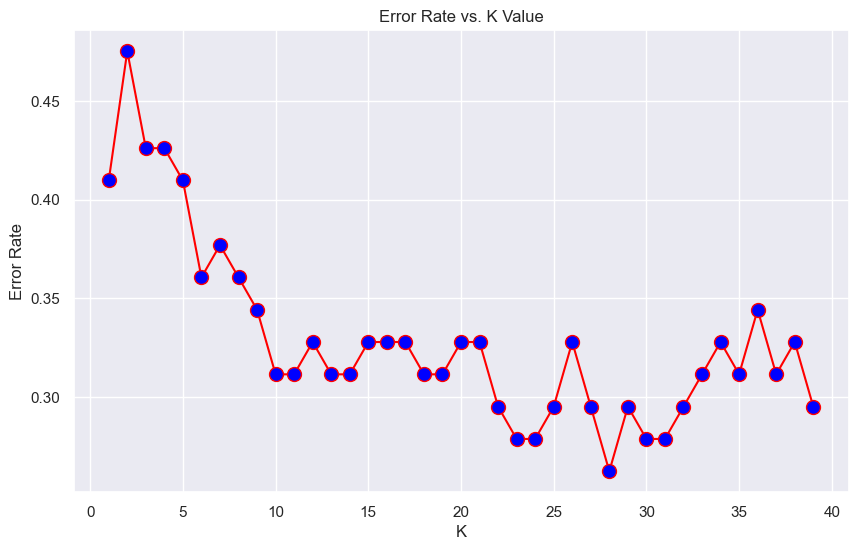

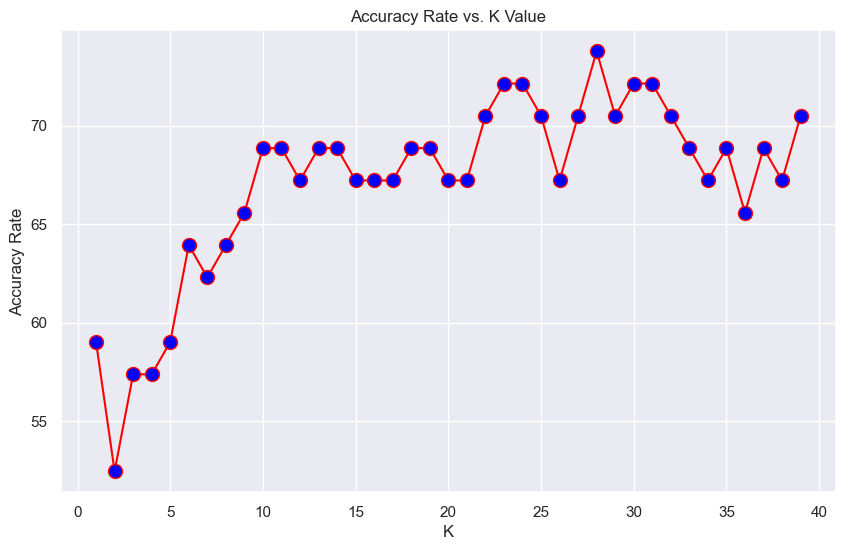

In [29]:
# grid search for most optimal k
error_rate = []
acc = []

for i in range(1,40):
    model_KNN_Heart = KNeighborsClassifier(n_neighbors=i)
    model_KNN_Heart.fit(X_trainHeart, Y_trainHeart)
    pred_i = model_KNN_Heart.predict(X_testHeart)
    error_rate.append(np.mean(pred_i != Y_testHeart))
    acc.append(accuracy_score(Y_testHeart, pred_i.round())*100)

    
# First Plot: Error Rate vs K value
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='red',
                linestyle ='solid', marker ='o',
         markerfacecolor ='blue', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Second Plot: Accuracy vs K value
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), acc, color ='red',
                linestyle ='solid', marker ='o',
         markerfacecolor ='blue', markersize = 10)
  
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')


# This is to find the optimal k value (index is offset by 1)
print("Optimal K value is", 1 + error_rate.index(min(error_rate)))

The accuracy of KNN for k=28 is :  73.77049180327869 % 



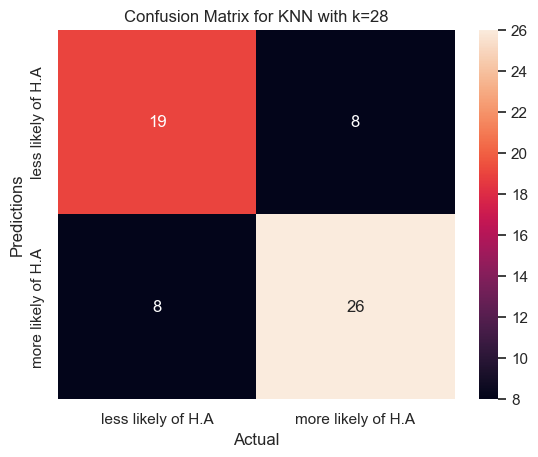

In [30]:
# knn classifier with k = 28
model_KNN_Heart = KNeighborsClassifier(n_neighbors = 28)  
model_KNN_Heart.fit(X_trainHeart, Y_trainHeart)
predicted = model_KNN_Heart.predict(X_testHeart)
  

cm_KNN_Heart = confusion_matrix(Y_testHeart, predicted)
ax= plt.subplot()

#annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_KNN_Heart, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_ylabel('Predictions');ax.set_xlabel('Actual'); 
ax.set_title('Confusion Matrix for KNN with k=28'); 
ax.xaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']); 
ax.yaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']);
print("The accuracy of KNN for k=28 is : ", accuracy_score(Y_testHeart, predicted.round())*100, "% \n")
add_to_accuracy_report("KNN",accuracy_score(Y_testHeart, predicted)*100)

The first machine learning model we consider is the KNN model. When we initially ran our KNN model we had a dismal accuracy rate of only 59%. To improve upon this result, we implement a for loop to find the optimal number of neighbors for our KNN model. Doing so, we find that using 28 neighbors reduces are error rate and gives us the highest accuracy rate of 73%. 

### Logistic Regression

In [31]:
# import our Logistic Regression model
from sklearn.linear_model import LogisticRegression

The accuracy of Logistic Regression is :  86.88524590163934 % 



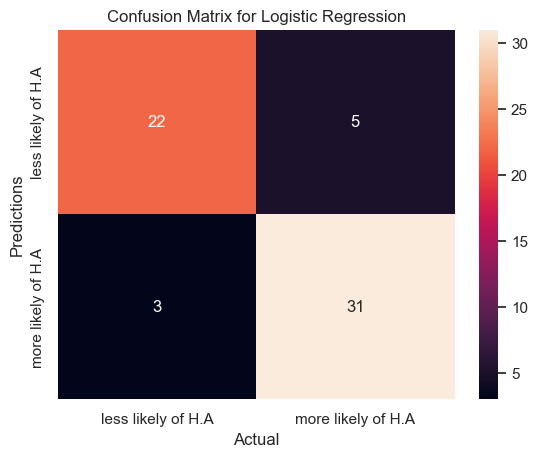

In [32]:
# instantiate our Logistic Regression
model_Log_Heart = LogisticRegression(max_iter=1000)
model_Log_Heart.fit(X_trainHeart, Y_trainHeart)
predicted=model_Log_Heart.predict(X_testHeart)

cm_Log = confusion_matrix(Y_testHeart, predicted)
ax= plt.subplot()

#annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_Log, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_ylabel('Predictions');ax.set_xlabel('Actual'); 
ax.set_title('Confusion Matrix for Logistic Regression'); 
ax.xaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']); 
ax.yaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']);
print("The accuracy of Logistic Regression is : ", accuracy_score(Y_testHeart, predicted.round())*100, "% \n")
add_to_accuracy_report("Logistic Regression",accuracy_score(Y_testHeart, predicted)*100)

The next model we consider is a Logistic Regression model. The logistic model is appropriate to use since we have a classification problem that has a binary outcome. We notice the accuracy for this model is 86% which is better than our most optimal KNN model.

### Naive Bayes

In [33]:
# import the Bernoulli, Gaussian, Multinomial Naive bayes
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

Gaussian, Bernoulli, and Multinomial Naive Bayes are three commonly used variants of the Naive Bayes algorithm. Each variant has its own set of assumptions and strengths:

Gaussian Naive Bayes:

Assumptions:
-Assumes that the continuous features follow a Gaussian distribution.
-Assumes that the features are conditionally independent given the class.

Strengths:
-Performs well on data with continuous features.
-Efficient for high-dimensional data.

Bernoulli Naive Bayes:

Assumptions:
-Assumes that the features are binary or categorical.
-Assumes that the features are conditionally independent given the class.

Strengths:
-Performs well on text classification tasks.
-Handles sparse data well.

Multinomial Naive Bayes:

Assumptions:
-Assumes that the features are counts of occurrences of events (e.g., word counts).
-Assumes that the features are conditionally independent given the class.

Strengths:
-Performs well on text classification tasks.
-Handles sparse data well.
-Efficient for high-dimensional data.

Overall strengths of Naive Bayes:
-Fast and easy to implement.
-Works well with small training datasets.
-Handles high-dimensional data well.
-Performs well in multiclass classification problems.
-Can handle both continuous and categorical data.
-Can handle missing data using simple imputation methods.

However, Naive Bayes has some limitations as well. It assumes that the features are conditionally independent given the class, which may not be true in some cases. It also assumes that the prior probabilities of the classes are known, which may not be the case in real-world scenarios.

The accuracy of Gaussian Naive Bayes model is :  90.1639344262295 % 



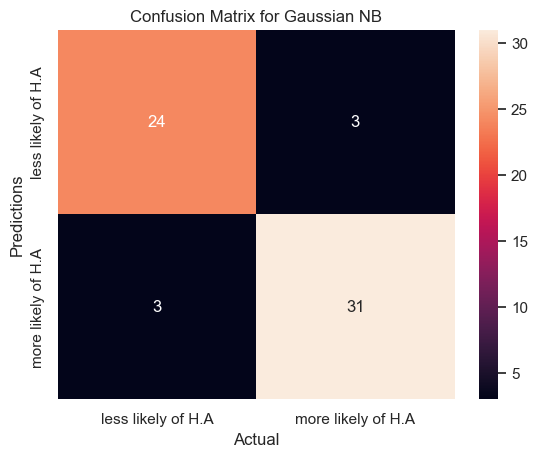

In [34]:
# instantiate Gaussian Naive Bayes model
model_GaussianNB_Heart = GaussianNB()
model_GaussianNB_Heart.fit(X_trainHeart, Y_trainHeart)
predicted = model_GaussianNB_Heart.predict(X_testHeart)

cm_GaussianNB = confusion_matrix(Y_testHeart, predicted)
ax= plt.subplot()

#annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_GaussianNB, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_ylabel('Predictions');ax.set_xlabel('Actual'); 
ax.set_title('Confusion Matrix for Gaussian NB'); 
ax.xaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']); 
ax.yaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']);
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(Y_testHeart, predicted.round())*100, "% \n")
add_to_accuracy_report("Gaussian Naive Bayes",accuracy_score(Y_testHeart, predicted)*100)

The accuracy of Bernoulli Naive Bayes model is :  81.9672131147541 % 



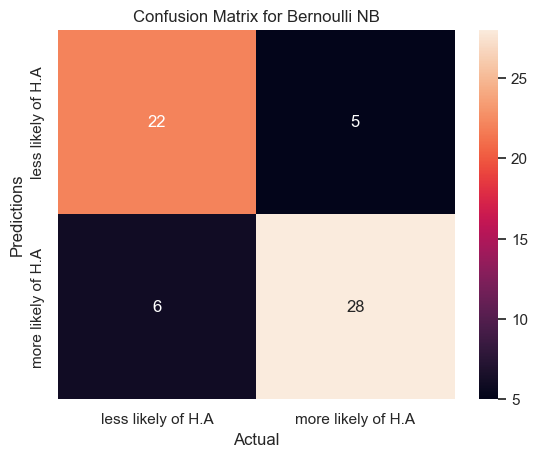

In [35]:
# instantiate our Bernoulli Naive Baye model
model_BernoulliNB_Heart = BernoulliNB()
model_BernoulliNB_Heart.fit(X_trainHeart, Y_trainHeart)
predicted = model_BernoulliNB_Heart.predict(X_testHeart)

cm_BernoulliNB = confusion_matrix(Y_testHeart, predicted)
ax= plt.subplot()

#annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_BernoulliNB, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_ylabel('Predictions');ax.set_xlabel('Actual'); 
ax.set_title('Confusion Matrix for Bernoulli NB'); 
ax.xaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']); 
ax.yaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']);
print("The accuracy of Bernoulli Naive Bayes model is : ", accuracy_score(Y_testHeart, predicted.round())*100, "% \n")
add_to_accuracy_report("Bernoulli Naive Bayes",accuracy_score(Y_testHeart, predicted)*100)

The accuracy of Multinomial Naive Bayes model is :  83.60655737704919 % 



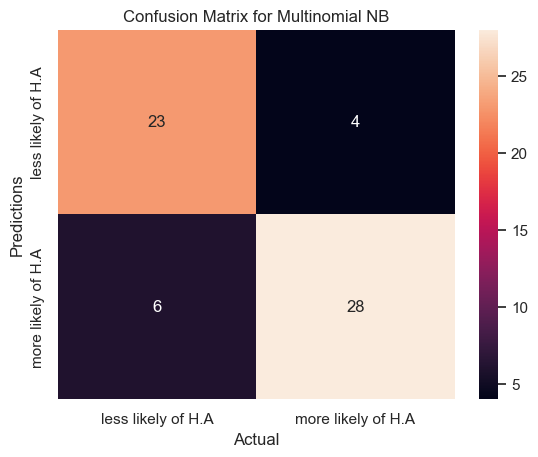

In [36]:
# instantiate our Multinomial Naive Baye model
model_MultinomialNB_Heart = MultinomialNB()
model_MultinomialNB_Heart.fit(X_trainHeart, Y_trainHeart)
predicted = model_MultinomialNB_Heart.predict(X_testHeart)

cm_MultinomialNB = confusion_matrix(Y_testHeart, predicted)
ax= plt.subplot()

#annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_MultinomialNB, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_ylabel('Predictions');ax.set_xlabel('Actual'); 
ax.set_title('Confusion Matrix for Multinomial NB'); 
ax.xaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']); 
ax.yaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']);
print("The accuracy of Multinomial Naive Bayes model is : ", accuracy_score(Y_testHeart, predicted.round())*100, "% \n")
add_to_accuracy_report("Multinomial Naive Bayes",accuracy_score(Y_testHeart, predicted)*100)

The next model we consider is Naive Bayes. Scikit-learn allows for three naive Bayes implementations. They are the Gaussian, Bernoulli and Multinomial. As the name implies the differences between them is the probability distribution function used to characterize the input variables. Given that our dataset has binary, discrete as well as continuous variables we implement all three. Doing so find that Gaussian model best provides the best accuracy rate, which is 90%, higher than both the KNN model and Logistic regression. Also, we believe the Gaussian model does better than Bernoulli and Multinomial models because our dataset includes for categorical and continuous input variables. Hence, the Bernoulli and Multinomial models fail to grasp the full range of the input. Essentially, the Guassian model is most general.  

As expected, the models ordered from most to least accurate is Gaussian NB, Multinomial NB, and Binomial NB. The Multinomial model fared better than the Bernoulli model since it does not assume all categorical variables are binary. 

### Support Vector Machine (SVM)

In [37]:
# import support vector classifier for our classification problem
from sklearn.svm import SVC

The accuracy of SVM is :  70.49180327868852 % 



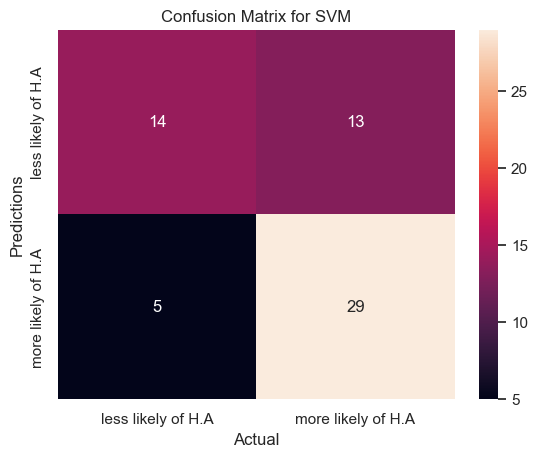

In [38]:
# instantiate our Support Vector Classifier
model_SVM_Heart = SVC()
model_SVM_Heart.fit(X_trainHeart, Y_trainHeart)
predicted = model_SVM_Heart.predict(X_testHeart)

cm_svm = confusion_matrix(Y_testHeart, predicted)
ax= plt.subplot()

#annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_svm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_ylabel('Predictions');ax.set_xlabel('Actual'); 
ax.set_title('Confusion Matrix for SVM'); 
ax.xaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']); 
ax.yaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']);
print("The accuracy of SVM is : ", accuracy_score(Y_testHeart, predicted.round())*100, "% \n")
add_to_accuracy_report("SVM",accuracy_score(Y_testHeart, predicted)*100)

We chose SVM since this model is more general and flexible because it does not make any assumptions about the data unlike LDA which assumes the data is normally distributed and is not as flexible. Running this model we find the accuracy rate of SVM is 70%. 

### Random Forest

In [39]:
# import Random forest Classifier
from sklearn.ensemble import RandomForestClassifier

The accuracy of Random Forest with Gini criterion is :  85.24590163934425 % 



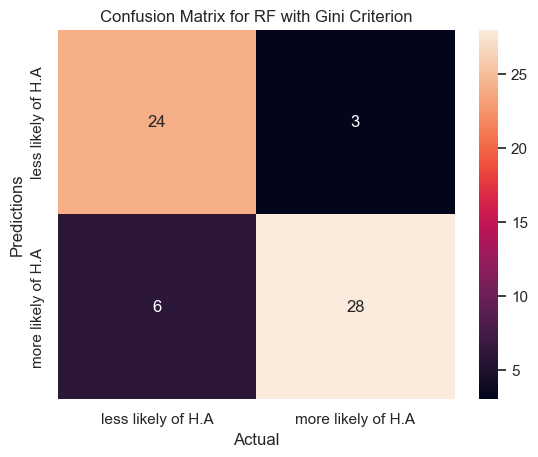

In [40]:
# Instantiate Gini-Random Forest
model_RF_Gini_Heart = RandomForestClassifier(n_estimators = 100,criterion="gini",random_state = 4545,max_depth=100) 
model_RF_Gini_Heart.fit(X_trainHeart, Y_trainHeart)  
predicted = model_RF_Gini_Heart.predict(X_testHeart)

cm_RF_Gini_Heart = confusion_matrix(Y_testHeart, predicted)
ax= plt.subplot()

#annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_RF_Gini_Heart, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_ylabel('Predictions');ax.set_xlabel('Actual'); 
ax.set_title('Confusion Matrix for RF with Gini Criterion'); 
ax.xaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']); 
ax.yaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']); 
print("The accuracy of Random Forest with Gini criterion is : ", accuracy_score(Y_testHeart, predicted.round())*100, "% \n")
add_to_accuracy_report("Random Forest with Gini",accuracy_score(Y_testHeart, predicted)*100)

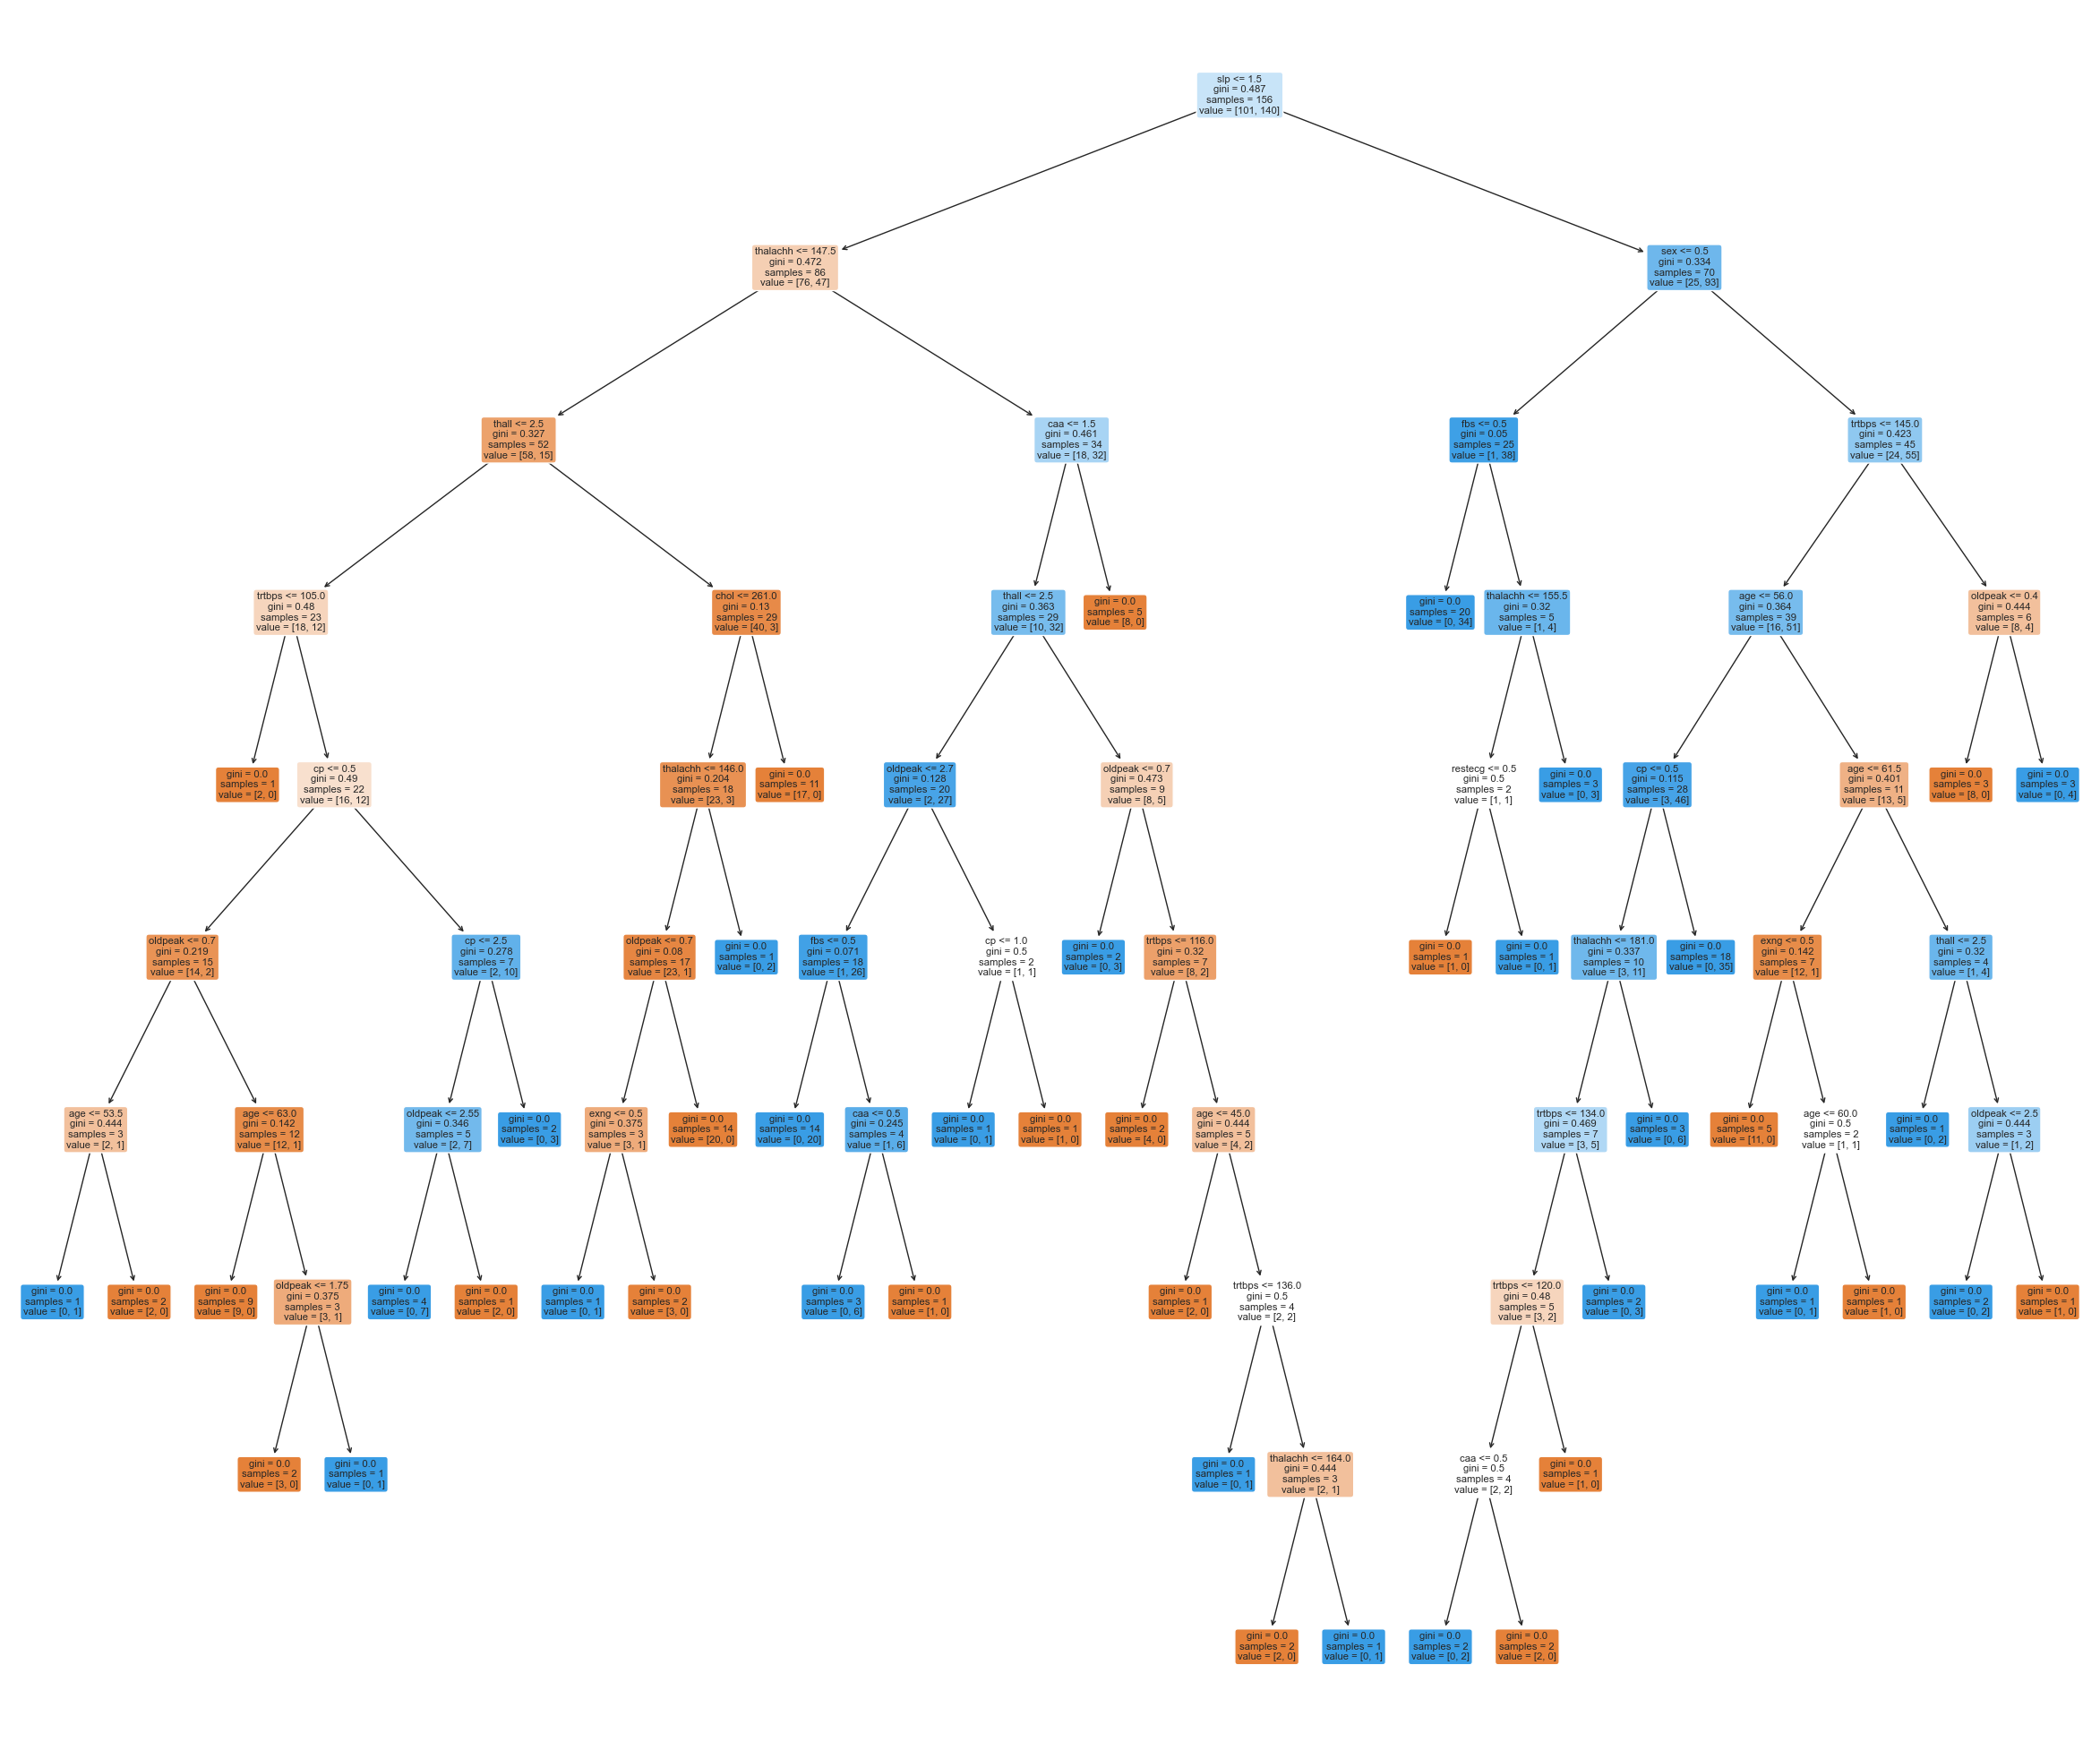

In [41]:
# Easiest way to plot a tree
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(30,25))
plot_tree(model_RF_Gini_Heart.estimators_[0], feature_names=X.columns,
          filled=True, impurity=True, 
          rounded=True)
plt.show()

In [42]:
# save gini- random forest tree

#fig.savefig('giniRF_Heart.pdf')

The accuracy of Random Forest with Entropy criterion is :  86.88524590163934 % 



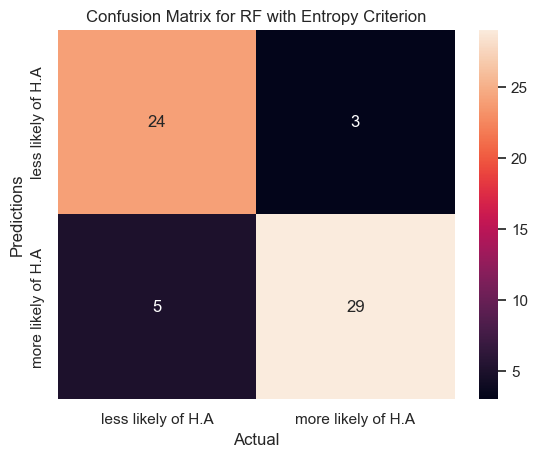

In [43]:
# Instantiate Entropy - Random Forest
model_RF_Entropy_Heart = RandomForestClassifier(n_estimators = 100,criterion="entropy",random_state = 4646,max_depth=100) 
model_RF_Entropy_Heart.fit(X_trainHeart, Y_trainHeart)  
predicted = model_RF_Entropy_Heart.predict(X_testHeart)

cm_RF_Entropy_Heart = confusion_matrix(Y_testHeart, predicted)
ax = plt.subplot()

#annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_RF_Entropy_Heart, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_ylabel('Predictions');ax.set_xlabel('Actual'); 
ax.set_title('Confusion Matrix for RF with Entropy Criterion'); 
ax.xaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']); 
ax.yaxis.set_ticklabels(['less likely of H.A', 'more likely of H.A']);
print("The accuracy of Random Forest with Entropy criterion is : ", accuracy_score(Y_testHeart, predicted.round())*100, "% \n")
add_to_accuracy_report("Random Forest with Entropy",accuracy_score(Y_testHeart, predicted)*100)

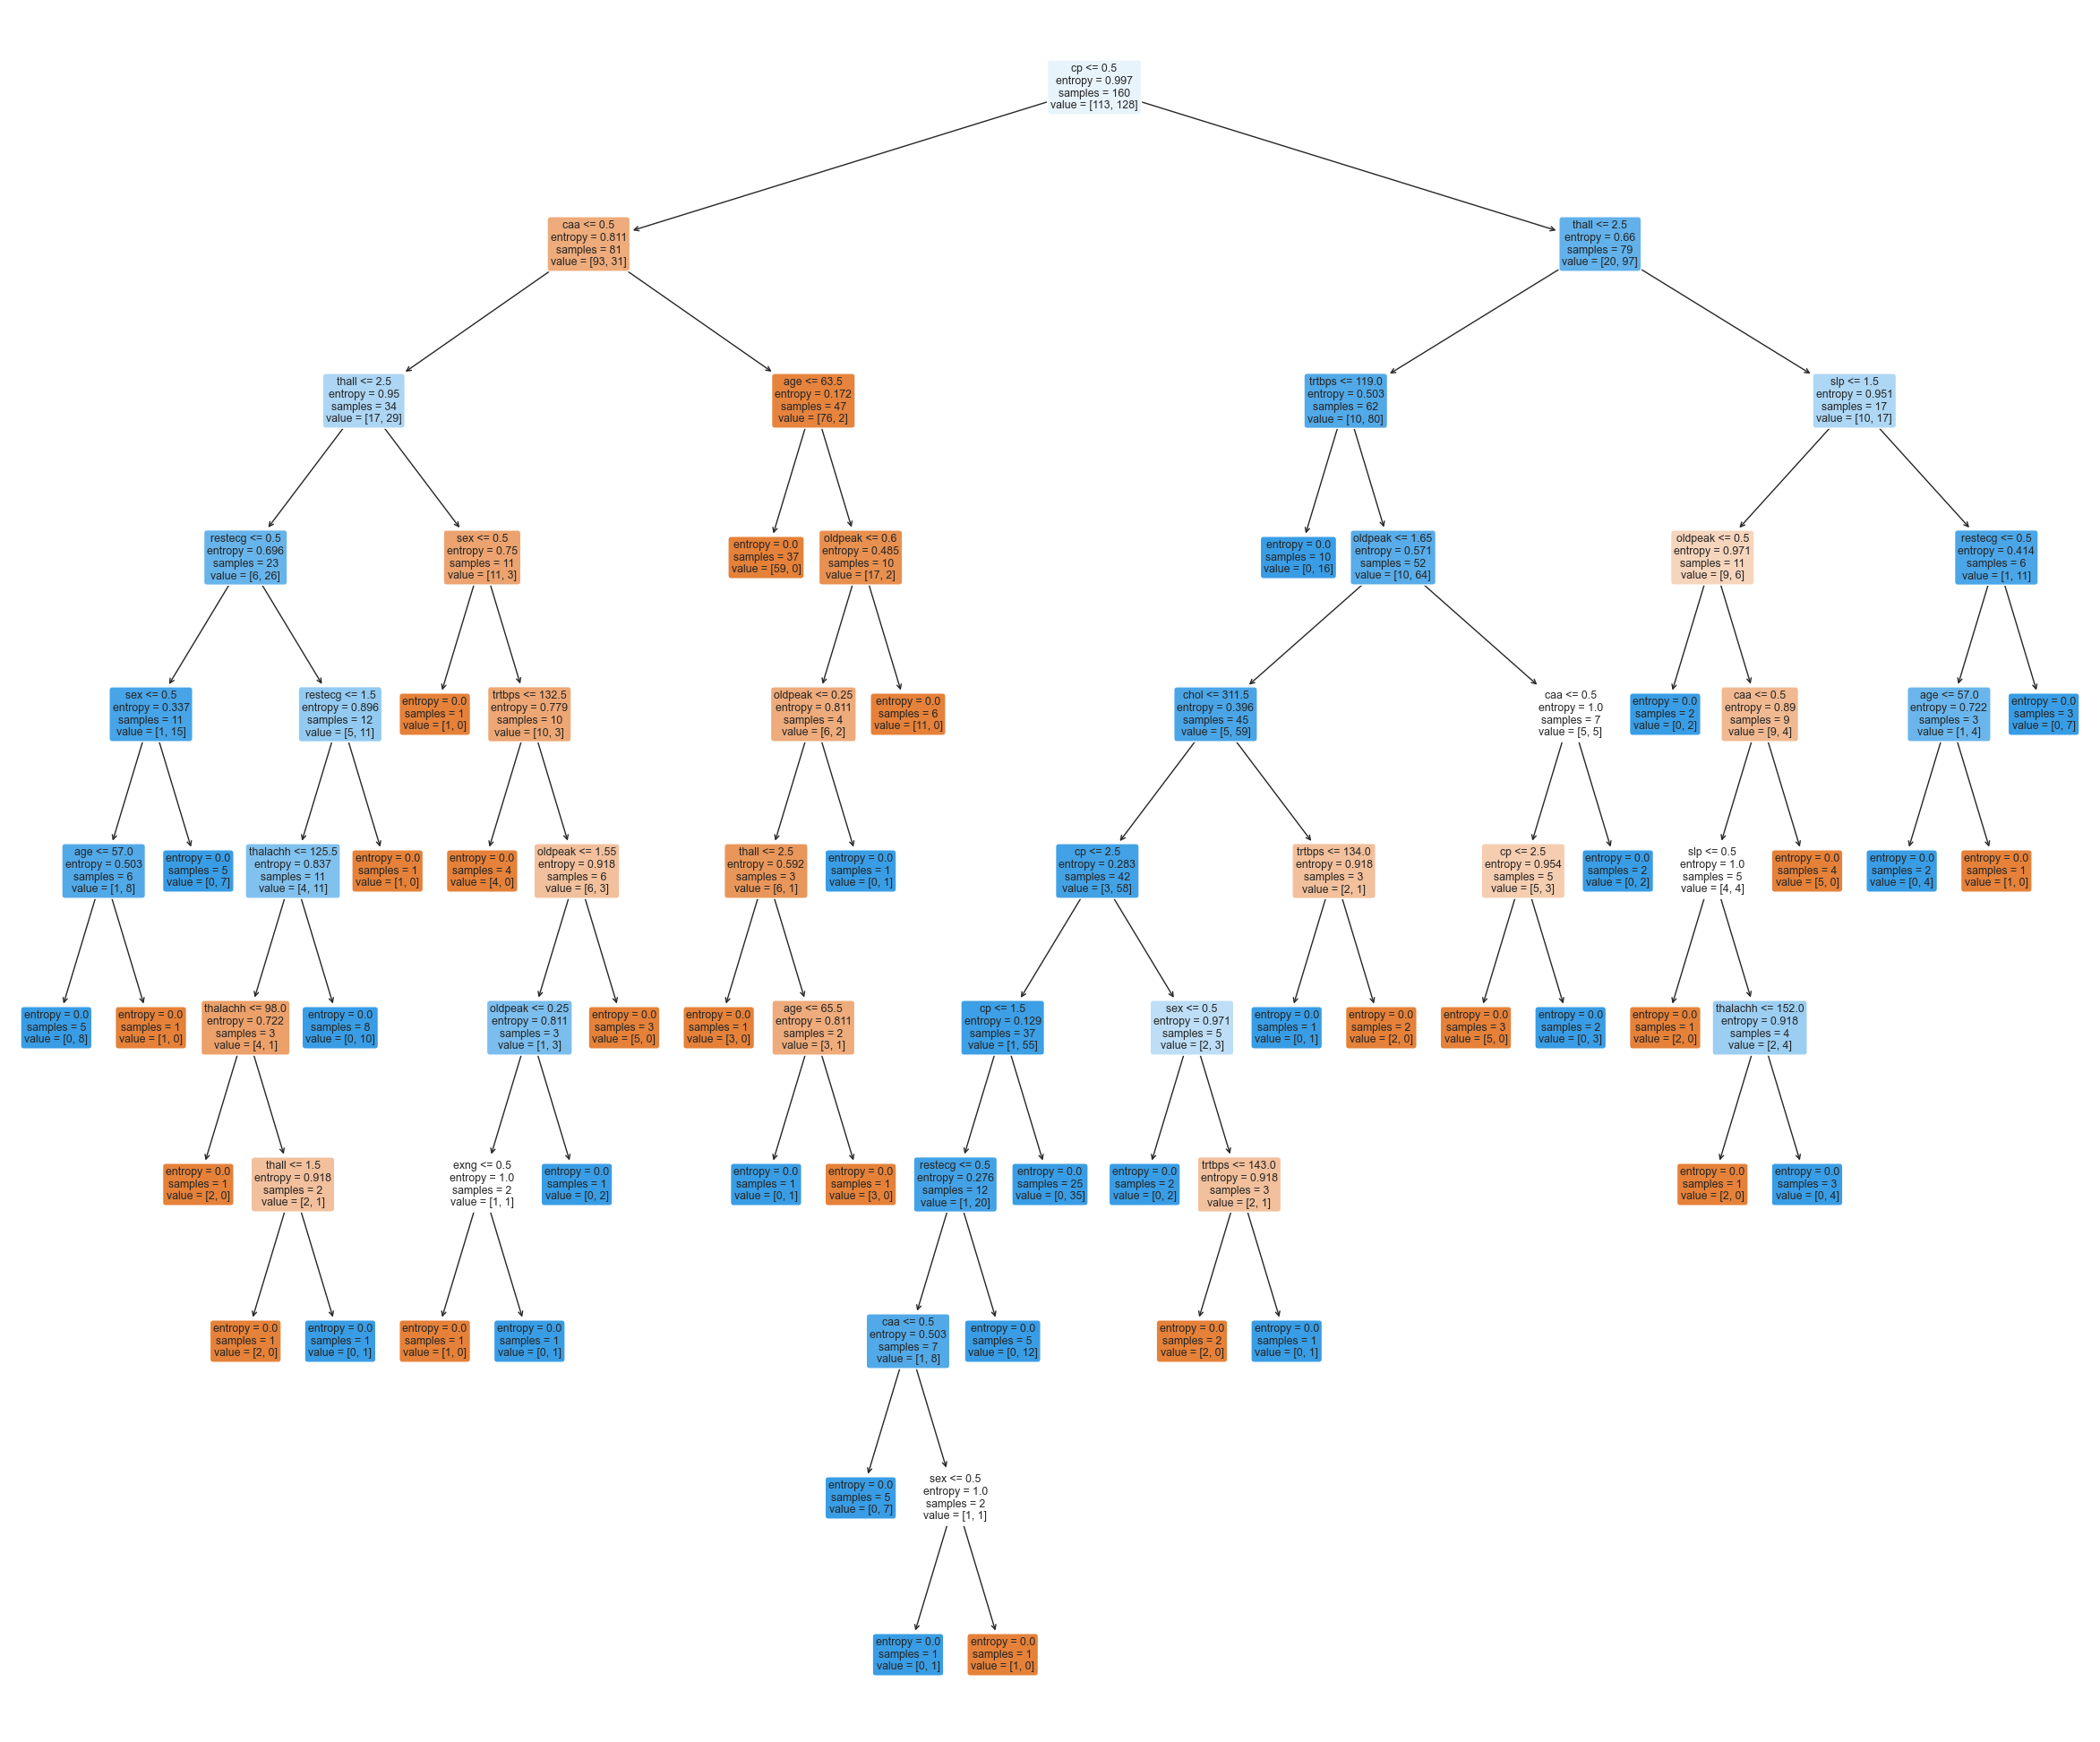

In [44]:
# plot Entropy- Random Forest Tree
fig = plt.figure(figsize=(30,25))
plot_tree(model_RF_Entropy_Heart.estimators_[0], feature_names=X.columns,
          filled=True, impurity=True, 
          rounded=True)
plt.show()

In [45]:
# save Entropy - Random Forest tree

#fig.savefig('entropyRF_Heart.pdf')

The last machine learning model we consider is Random Forest, which is a type of decision tree. Scikit-learn allows for two types of 'criterion' to be selected when running the Random Forest classier. They are Gini and Entropy. The difference between the criterion lies in the mathematical formula used to determine the purity of a node. Usually they give similar results, which they did in this dataset. By zooming in you can see the details of the branches and nodes of our random forest.

# The Final Ranking of the Algorithms

In [46]:
accuracy_scores_ranked = {k: v for k, v in sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True)}
accuracy_scores_ranked

{'Gaussian Naive Bayes': 90.1639344262295,
 'Logistic Regression': 86.88524590163934,
 'Random Forest with Entropy': 86.88524590163934,
 'Random Forest with Gini': 85.24590163934425,
 'Multinomial Naive Bayes': 83.60655737704919,
 'Bernoulli Naive Bayes': 81.9672131147541,
 'KNN': 73.77049180327869,
 'SVM': 70.49180327868852}

# Summary and Conclusion 

Our goal with this project was to compare and analyze how different machine learning algorithms fared when applied to different datasets. For our project, we chose two classification problems both of which had a binary outcome and ran the following models: KNN, Logistic Regression, Naive Bayes, SVM and Random Forest models.
The two datasets we used were a mushroom dataset which analyzed whether a mushroom was edible or poisonous and a heart attack dataset which assessed increased or decreased likelihood of experiencing a heart attack. Comparing the results from the Heart Attack dataset with the Mushroom classification dataset all models (except for Multinomial Naive Bayes) performed better with the Mushroom dataset. We presume that there are several reasons why this would be the case. First, the mushroom dataset is much larger with a total number of observations being 8124 relative to 302 for the heart attack dataset, an almost 26 to 1 ratio. This allows for a much larger training set to be used to build the mushroom dataset models. The larger training set allows the models to be more refined and hence more accurate. Second, is the complexity of the underlying variables. Although, that mushroom dataset had more independent variables, 21 relative to 13, the underlying data for heart attacks were more complex. The mushroom dataset only included categorical and binary data, whereas the heart dataset had categorical, binary as well as continuous variables. A visual representation of this can be seen from observing the decision trees generated by our random forest models. Not only were accuracy rates at 100% for the mushroom dataset, but the decision trees were also much simpler relative to the Heart Attack dataset. 
In terms of data preparation, the mushroom dataset required more processing since multiple variables had numerical and letter identification which had to be translated/labeled into English words.  Prior to running any models, through visualization and exploratory data analysis both datasets revealed interesting facts and information.  As for suggestions for future research, we can reconstruct our models using a larger heart attack dataset to see if increasing the number of observations will help close the gap in model accuracy obtained by the mushroom dataset. 
Another improvement we can make is using cross validation to run multiple iterations of each model and taking an average. We could not implement this since doing this is computationally heavy.